<a href="https://colab.research.google.com/github/rendrasatriar/Density-SILO/blob/Bintangor/Bintangor_SAP_YLIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
!pip install --quiet google-cloud-bigquery pandas pyarrow

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [288]:
from google.cloud import bigquery
import pandas as pd

PROJECT_ID = "study-density-silo"
DATASET_ID = "study_density"
TABLE_ID = "raw_data_bintangor"

client = bigquery.Client(project=PROJECT_ID)

def fetch_single_block(project: str, dataset: str, table_id: str, max_rows: int = None) -> pd.DataFrame:
    table_full = f"{project}.{dataset}.{table_id}"
    query = f"SELECT * FROM `{table_full}`"
    job = client.query(query)
    if max_rows:
        return job.result(max_results=max_rows).to_dataframe()
    return job.to_dataframe()

In [289]:
# --- Ambil data satu blok ---
df_block = fetch_single_block(PROJECT_ID, DATASET_ID, TABLE_ID)
print(f"Loaded table: {PROJECT_ID}.{DATASET_ID}.{TABLE_ID}")
print("Rows:", len(df_block))
print("Columns:", len(df_block.columns))
print("Shape:", df_block.shape)
print("-" * 60)

# --- Informasi kolom dan tipe data ---
print("\nColumn info:")
print(df_block.dtypes)
print("\nMemory usage (MB):")
print(df_block.memory_usage(deep=True).sum() / 1024**2)

# --- Statistik numerik singkat ---
print("\nDescriptive statistics (numeric columns):")
display(df_block.describe().transpose())

# --- Distribusi kategori penting ---
if 'GEN_LYR' in df_block.columns:
    print("\nUnique GEN_LYR count:", df_block['GEN_LYR'].nunique())
    print("Top GEN_LYR value counts:")
    display(df_block['GEN_LYR'].value_counts().head(20))

if 'Material' in df_block.columns:
    print("\nUnique Material count:", df_block['Material'].nunique())
    print("Top Material value counts:")
    display(df_block['Material'].value_counts().head(20))

# --- Quick QAQC checks ---
print("\nQAQC checks:")
if {'Interval','From','To'}.issubset(df_block.columns):
    n_bad_interval = len(df_block[(df_block['Interval'] <= 0) | (df_block['To'] <= df_block['From'])])
    print("Rows with Interval <= 0 or To <= From:", n_bad_interval)
else:
    print("Columns Interval/From/To not all present for QAQC checks.")

Loaded table: study-density-silo.study_density.raw_data_bintangor
Rows: 11548
Columns: 16
Shape: (11548, 16)
------------------------------------------------------------

Column info:
HoleId         object
Hill           object
Hill_Group     object
From          float64
To            float64
Interval      float64
CoreRec       float64
WetW          float64
H2O           float64
DryW          float64
Material       object
Layer          object
NEW_LYR        object
GEN_LYR        object
WTF           float64
DTF           float64
dtype: object

Memory usage (MB):
4.864101409912109

Descriptive statistics (numeric columns):


,count,mean,std,min,25%,50%,75%,max
From,11548.0,5.680615,3.949815,0.000000,2.600000,5.075000,8.000000,23.000000
To,11548.0,6.448785,3.934414,0.200000,3.000000,6.000000,9.000000,23.900000
Interval,11548.0,0.768170,0.290259,0.050000,0.500000,1.000000,1.000000,3.000000
CoreRec,11548.0,1.081167,0.188022,0.200000,1.000000,1.000000,1.090000,3.500000
WetW,11548.0,4.179988,1.862441,0.400000,2.640000,4.259500,5.515000,13.340000
H2O,11548.0,25.032835,14.841084,0.079000,12.402250,25.364500,36.083250,90.147000
DryW,11548.0,3.181767,1.628951,0.156000,1.835000,3.057500,4.336000,11.840000
WTF,11548.0,1.756388,0.571895,0.195304,1.489770,1.723069,1.953043,23.925631
DTF,11548.0,1.335409,0.587918,0.123134,0.992927,1.266640,1.612504,22.471965



Unique GEN_LYR count: 5
Top GEN_LYR value counts:


,count
GEN_LYR,
LIM,5803
BRK,2925
SAP,2291
SAPX,312
LIMX,217



Unique Material count: 50
Top Material value counts:


,count
Material,
YLIM,2423
Rlim,1583
ESAP,1572
HGT,933
HSAP,882
RSAP,831
Sap,700
RLIM,380
DNT,365



QAQC checks:
Rows with Interval <= 0 or To <= From: 0


# Filter By GEN_LYR dan Material

In [363]:

gen_lyr_input = input("Masukkan GEN_LYR yang ingin difilter: ").strip()
material_input = input("Masukkan Material yang ingin difilter: ").strip()

df_filtered = df_block.copy()

if 'GEN_LYR' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['GEN_LYR'].str.upper() == gen_lyr_input.upper()]

if 'Material' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['Material'].str.upper() == material_input.upper()]

print(f"\nFiltered rows: {len(df_filtered)}")
display(df_filtered.head(133))

Masukkan GEN_LYR yang ingin difilter: SAP
Masukkan Material yang ingin difilter: YLIM

Filtered rows: 127


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
971,CS7210355,Bintangor Blok 1 Spasi 50,BINTANGOR,1.00,1.50,0.50,1.60,2.840,44.366,1.580,YLIM,None,ESAP,SAP,1.214239,0.675527
1935,CD500090,BINTANGOR BARAT UTARA,BINTANGOR,1.80,2.00,0.20,1.00,1.125,36.000,0.720,YLIM,None,ESAP,SAP,1.923970,1.231341
1968,CS7210043,Bintangor Blok 2 Spasi 50,BINTANGOR,2.00,3.00,1.00,1.00,4.512,34.885,2.938,YLIM,None,ESAP,SAP,1.543280,1.004911
2709,CS7210162,Bintangor Blok 1 Spasi 50,BINTANGOR,2.16,3.15,0.99,1.36,7.390,38.295,4.560,YLIM,None,ESAP,SAP,1.877353,1.158421
2801,CS7210172,Bintangor Blok 1 Spasi 50,BINTANGOR,2.46,3.00,0.54,1.67,4.470,40.492,2.660,YLIM,None,ESAP,SAP,1.695403,1.008898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10499,CS6210048,Bintangor Blok 2 Spasi 25,BINTANGOR,11.00,12.00,1.00,1.40,5.693,51.063,2.786,YLIM,None,ESAP,SAP,1.390877,0.680658
10536,CS6210046R,Bintangor Blok 2 Spasi 25,BINTANGOR,11.00,11.55,0.55,1.00,2.442,48.321,1.262,YLIM,None,SAP,SAP,1.518653,0.784824
10815,CS6210048,Bintangor Blok 2 Spasi 25,BINTANGOR,12.00,12.20,0.20,1.00,0.972,40.329,0.580,YLIM,None,ESAP,SAP,1.662310,0.991913
11062,CS7210170,Bintangor Blok 1 Spasi 50,BINTANGOR,13.15,13.65,0.50,1.00,1.805,46.260,0.970,YLIM,None,ESAP,SAP,1.234761,0.663556


# Filter By Interval

Descriptive statistics for Interval:
Count: 127
Mean: 0.602126
Standard Error: 0.024218
Median: 0.55
Mode: 1.0
Standard Deviation: 0.272925
Sample Variance: 0.074488
Kurtosis: -0.470707
Skewness: 0.543651
Range: 1.2599999999999998
Minimum: 0.14
Maximum: 1.4
Sum: 76.47000000000001
Confidence Level (95%): ±0.047927

Bin calculation:
Freedman–Diaconis -> bins: 9, bin width: 0.157166
Sturges -> bins: 8, bin width: 0.157500


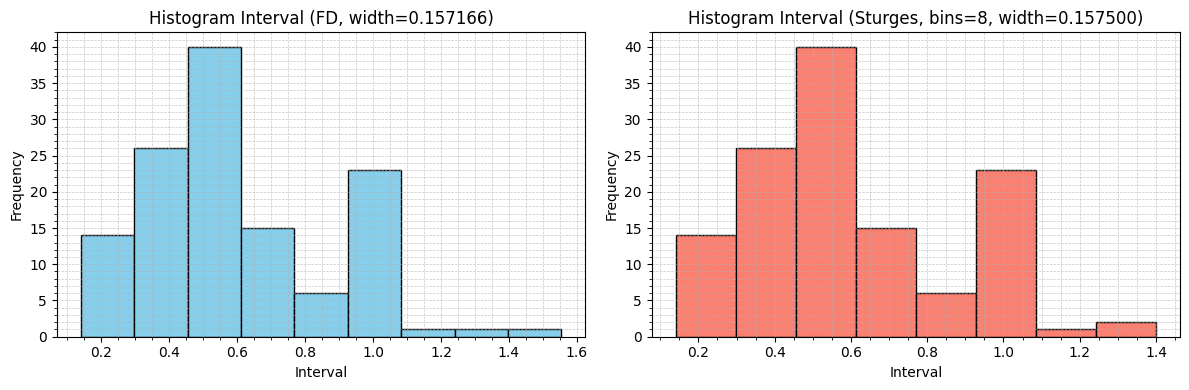


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.140000,0.297166,14
1,0.297166,0.454332,26
2,0.454332,0.611499,40
3,0.611499,0.768665,15
4,0.768665,0.925831,6
5,0.925831,1.082997,23
6,1.082997,1.240163,1
7,1.240163,1.397330,1
8,1.397330,1.554496,1



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.1400,0.2975,14
1,0.2975,0.4550,26
2,0.4550,0.6125,40
3,0.6125,0.7700,15
4,0.7700,0.9275,6
5,0.9275,1.0850,23
6,1.0850,1.2425,1
7,1.2425,1.4000,2


In [365]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return int(np.sqrt(n)), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series):
    data = series.dropna().values
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    se = stats.sem(data)
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0] if n > 0 else None
    var = np.var(data, ddof=1)
    kurt = stats.kurtosis(data)
    skew = stats.skew(data)
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else None

    print("Descriptive statistics for Interval:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}")
    print(f"Sample Variance: {var:.6f}")
    print(f"Kurtosis: {kurt:.6f}")
    print(f"Skewness: {skew:.6f}")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}")

def plot_interval_histograms(df_filtered):
    if 'Interval' not in df_filtered.columns:
        print("Kolom 'Interval' tidak ada di dataframe.")
        return

    data = df_filtered['Interval'].dropna()

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data)

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins: {bins_fd}, bin width: {width_fd_str}")
    print(f"Sturges -> bins: {bins_st}, bin width: {width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram Interval (FD, width={width_fd_str})")
    axes[0].set_xlabel("Interval")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram Interval (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("Interval")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
interval_data = plot_interval_histograms(df_filtered) # Corrected function call

In [366]:
# Pastikan df_filtered sudah ada
# Contoh: df_filtered = filter_data(df_block, "LIM", "RLIM")

# Minta input dari user
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))

# Filter data sesuai input
df_interval = df_filtered[(df_filtered['Interval'] >= lower_bound) &
                       (df_filtered['Interval'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_interval)}")
display(df_interval.head(50))

Masukkan batas bawah (is greater than or equal to): 0.140000
Masukkan batas atas (is less than or equal to): 0.768665

Filtered rows: 95


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
971,CS7210355,Bintangor Blok 1 Spasi 50,BINTANGOR,1.00,1.50,0.50,1.60,2.840,44.366,1.580,YLIM,None,ESAP,SAP,1.214239,0.675527
1935,CD500090,BINTANGOR BARAT UTARA,BINTANGOR,1.80,2.00,0.20,1.00,1.125,36.000,0.720,YLIM,None,ESAP,SAP,1.923970,1.231341
2801,CS7210172,Bintangor Blok 1 Spasi 50,BINTANGOR,2.46,3.00,0.54,1.67,4.470,40.492,2.660,YLIM,None,ESAP,SAP,1.695403,1.008898
3001,CS7210158,Bintangor Blok 1 Spasi 50,BINTANGOR,3.00,3.75,0.75,1.00,2.950,43.051,1.680,YLIM,None,ESAP,SAP,1.345354,0.766167
3003,CS7210127,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.20,0.20,1.00,0.926,27.646,0.670,YLIM,None,ESAP,SAP,1.583641,1.145831
3005,CS7210044,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.60,0.60,1.00,2.243,40.348,1.338,YLIM,None,ESAP,SAP,1.278656,0.762747
3006,CS7210125,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.50,0.50,1.30,2.797,40.865,1.654,YLIM,None,ESAP,SAP,1.471820,0.870358
3010,CS7210161,Bintangor Blok 1 Spasi 50,BINTANGOR,3.00,3.50,0.50,1.00,2.070,45.411,1.130,YLIM,None,ESAP,SAP,1.416042,0.773008
3015,CD500062,BINTANGOR BARAT UTARA,BINTANGOR,3.00,3.30,0.30,1.00,1.008,39.980,0.605,YLIM,None,ESAP,SAP,1.149251,0.689779
3434,CS7210043,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.65,0.65,1.00,2.499,40.056,1.498,YLIM,None,LIM,SAP,1.315009,0.788268


# Filter By Recovery


Descriptive statistics for CoreRec:
Count: 95
Mean: 1.169895
Standard Error: 0.022314
Median: 1.08
Mode: 1.0
Standard Deviation: 0.217488
Sample Variance: 0.047301
Kurtosis: -0.455310
Skewness: 0.699685
Range: 1.0299999999999998
Minimum: 0.67
Maximum: 1.7
Sum: 111.14
Confidence Level (95%): ±0.044305

Bin calculation:
Freedman–Diaconis -> bins=8, width=0.135878
Sturges -> bins=8, width=0.128750


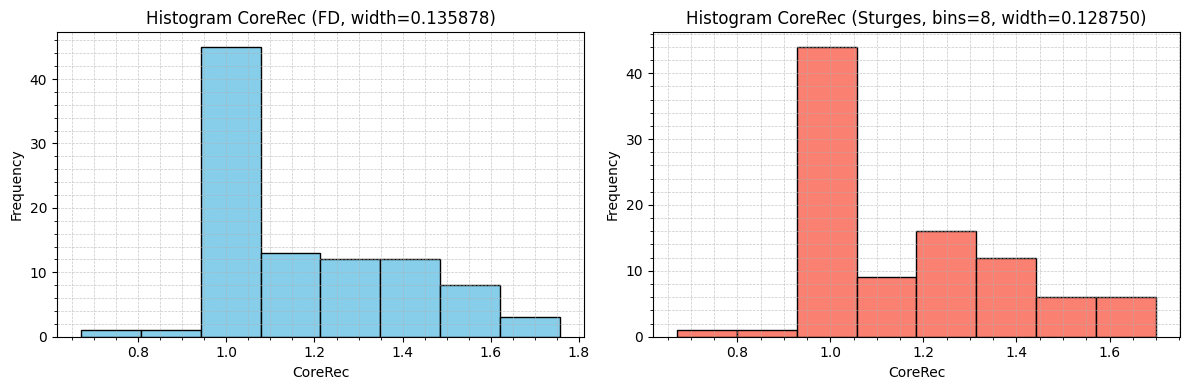


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.670000,0.805878,1
1,0.805878,0.941757,1
2,0.941757,1.077635,45
3,1.077635,1.213514,13
4,1.213514,1.349392,12
5,1.349392,1.485271,12
6,1.485271,1.621149,8
7,1.621149,1.757027,3



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.67000,0.79875,1
1,0.79875,0.92750,1
2,0.92750,1.05625,44
3,1.05625,1.18500,9
4,1.18500,1.31375,16
5,1.31375,1.44250,12
6,1.44250,1.57125,6
7,1.57125,1.70000,6


In [367]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="CoreRec"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_coreRec(df_interval):
    if 'CoreRec' not in df_interval.columns:
        print("Kolom 'CoreRec' tidak ada di dataframe.")
        return

    data = df_interval['CoreRec'].dropna()
    if data.empty:
        print("Tidak ada data 'CoreRec' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="CoreRec")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram CoreRec (FD, width={width_fd_str})")
    axes[0].set_xlabel("CoreRec")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram CoreRec (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("CoreRec")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
coreRec_data = analyze_coreRec(df_interval)

In [368]:
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))


df_recovery = df_interval[(df_interval['CoreRec'] >= lower_bound) &
                       (df_interval['CoreRec'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_recovery)}")
display(df_recovery.head(47))

Masukkan batas bawah (is greater than or equal to): 0.941757
Masukkan batas atas (is less than or equal to): 1.077635

Filtered rows: 45


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
1935,CD500090,BINTANGOR BARAT UTARA,BINTANGOR,1.80,2.00,0.20,1.00,1.125,36.000,0.720,YLIM,None,ESAP,SAP,1.923970,1.231341
3001,CS7210158,Bintangor Blok 1 Spasi 50,BINTANGOR,3.00,3.75,0.75,1.00,2.950,43.051,1.680,YLIM,None,ESAP,SAP,1.345354,0.766167
3003,CS7210127,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.20,0.20,1.00,0.926,27.646,0.670,YLIM,None,ESAP,SAP,1.583641,1.145831
3005,CS7210044,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.60,0.60,1.00,2.243,40.348,1.338,YLIM,None,ESAP,SAP,1.278656,0.762747
3010,CS7210161,Bintangor Blok 1 Spasi 50,BINTANGOR,3.00,3.50,0.50,1.00,2.070,45.411,1.130,YLIM,None,ESAP,SAP,1.416042,0.773008
3015,CD500062,BINTANGOR BARAT UTARA,BINTANGOR,3.00,3.30,0.30,1.00,1.008,39.980,0.605,YLIM,None,ESAP,SAP,1.149251,0.689779
3434,CS7210043,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.65,0.65,1.00,2.499,40.056,1.498,YLIM,None,LIM,SAP,1.315009,0.788268
3723,CS7210111,Bintangor Blok 2 Spasi 50,BINTANGOR,3.20,3.45,0.25,1.00,0.976,42.418,0.562,YLIM,None,ESAP,SAP,1.335320,0.768904
3737,CS7210127,Bintangor Blok 2 Spasi 50,BINTANGOR,3.20,3.50,0.30,1.00,1.834,16.794,1.526,YLIM,None,SAP,SAP,2.090999,1.739839
4063,CD500215,BINTANGOR BARAT UTARA,BINTANGOR,4.00,4.65,0.65,1.00,2.205,38.005,1.367,YLIM,None,ESAP,SAP,1.160302,0.719334


# Filter By Wet Weight

Tidak ada data dengan Interval=1.0 dan CoreRec=1.0.
Menggunakan seluruh data sebagai acuan residual.

Residual IQR acuan:
Q1: -0.186, Q3: 0.143, IQR: 0.329
Lower margin: -0.679, Upper margin: 0.636


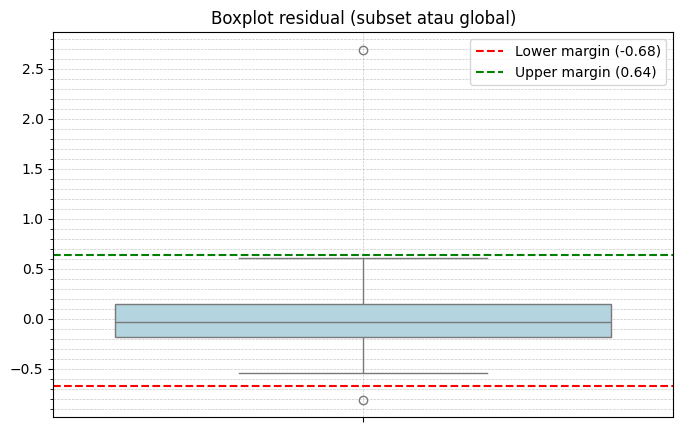

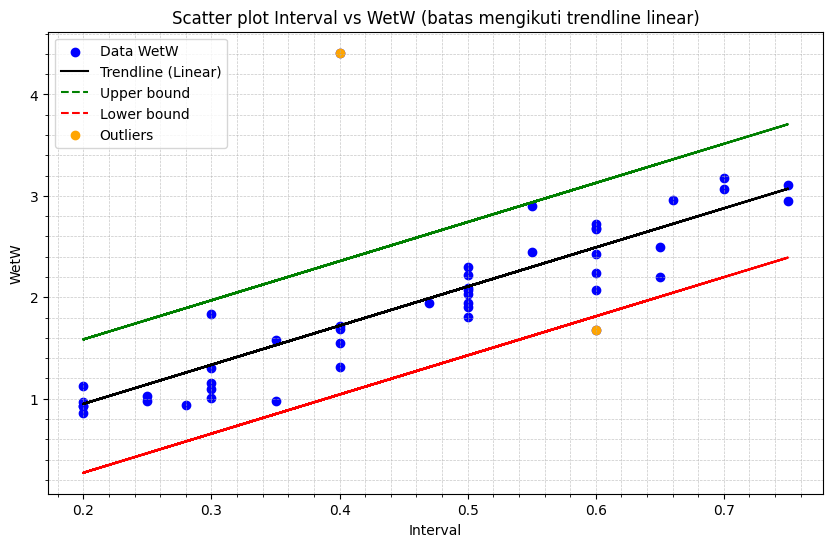


Outlier WetW berdasarkan trendline linear + IQR residual acuan:
         HoleId                       Hill Hill_Group  From   To  Interval  \
5225  CS7210107  Bintangor Blok 2 Spasi 50  BINTANGOR   5.0  5.6       0.6   
5257   CD500169    BINTANGOR BARAT SELATAN  BINTANGOR   5.0  5.4       0.4   

      CoreRec   WetW     H2O   DryW Material Layer NEW_LYR GEN_LYR       WTF  \
5225      1.0  1.681  41.225  0.988     YLIM  None    ESAP     SAP  0.958279   
5257      1.0  4.412   9.112  4.010     YLIM  None    ESAP     SAP  3.772691   

           DTF  
5225  0.563224  
5257  3.428941  


In [369]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['WetW'], color='blue', label='Data WetW')
    plt.plot(df_recovery['Interval'], y_pred, color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], y_pred + upper_margin, color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], y_pred + lower_margin, color='red', linestyle='--', label='Lower bound')

    # Outlier = data di luar batas trendline ± margin
    outliers = df_recovery[(df_recovery['WetW'] > y_pred + upper_margin) |
                           (df_recovery['WetW'] < y_pred + lower_margin)]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("WetW")
    plt.legend()
    plt.show()

    return {
        "outliers": outliers,
        "margins": {"lower": lower_margin, "upper": upper_margin},
        "trendline_coef": {"slope": model.coef_[0], "intercept": model.intercept_}
    }

# --- Contoh pemanggilan ---
result = detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
if result:
    print("\nOutlier WetW berdasarkan trendline linear + IQR residual acuan:")
    print(result["outliers"].head())

## Normalisasi Weight terhadap recovery

In [370]:
import numpy as np
from IPython.display import display

def normalize_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns or 'CoreRec' not in df_recovery.columns:
        print("Kolom 'WetW' atau 'CoreRec' tidak ada di dataframe.")
        return df_recovery

    # Buat kolom baru Normalized_WetW
    df_recovery['Normalized_WetW'] = np.where(
        df_recovery['CoreRec'] > 1.0,
        df_recovery['WetW'] / 1,          # jika CoreRec > 1.0
        df_recovery['WetW'] / df_recovery['CoreRec']  # jika CoreRec <= 1.0
    )

    print("\nNormalisasi WetW terhadap Recovery selesai.")
    # tampilkan seluruh dataframe dengan kolom tambahan
    display(df_recovery)

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = normalize_wetw(df_recovery)


Normalisasi WetW terhadap Recovery selesai.


/tmp/ipython-input-7809237.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Normalized_WetW'] = np.where(


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW
1935,CD500090,BINTANGOR BARAT UTARA,BINTANGOR,1.80,2.00,0.20,1.00,1.125,36.000,0.720,YLIM,None,ESAP,SAP,1.923970,1.231341,1.125
3001,CS7210158,Bintangor Blok 1 Spasi 50,BINTANGOR,3.00,3.75,0.75,1.00,2.950,43.051,1.680,YLIM,None,ESAP,SAP,1.345354,0.766167,2.950
3003,CS7210127,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.20,0.20,1.00,0.926,27.646,0.670,YLIM,None,ESAP,SAP,1.583641,1.145831,0.926
3005,CS7210044,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.60,0.60,1.00,2.243,40.348,1.338,YLIM,None,ESAP,SAP,1.278656,0.762747,2.243
3010,CS7210161,Bintangor Blok 1 Spasi 50,BINTANGOR,3.00,3.50,0.50,1.00,2.070,45.411,1.130,YLIM,None,ESAP,SAP,1.416042,0.773008,2.070
3015,CD500062,BINTANGOR BARAT UTARA,BINTANGOR,3.00,3.30,0.30,1.00,1.008,39.980,0.605,YLIM,None,ESAP,SAP,1.149251,0.689779,1.008
3434,CS7210043,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.65,0.65,1.00,2.499,40.056,1.498,YLIM,None,LIM,SAP,1.315009,0.788268,2.499
3723,CS7210111,Bintangor Blok 2 Spasi 50,BINTANGOR,3.20,3.45,0.25,1.00,0.976,42.418,0.562,YLIM,None,ESAP,SAP,1.335320,0.768904,0.976
3737,CS7210127,Bintangor Blok 2 Spasi 50,BINTANGOR,3.20,3.50,0.30,1.00,1.834,16.794,1.526,YLIM,None,SAP,SAP,2.090999,1.739839,1.834
4063,CD500215,BINTANGOR BARAT UTARA,BINTANGOR,4.00,4.65,0.65,1.00,2.205,38.005,1.367,YLIM,None,ESAP,SAP,1.160302,0.719334,2.205


Tidak ada data dengan Interval=1.0 dan CoreRec=1.0.
Menggunakan seluruh data sebagai acuan residual.

Residual IQR acuan:
Q1: -0.186, Q3: 0.143, IQR: 0.329
Lower margin: -0.679, Upper margin: 0.636


/tmp/ipython-input-1577443899.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
/tmp/ipython-input-1577443899.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Outlier_Status'] = [


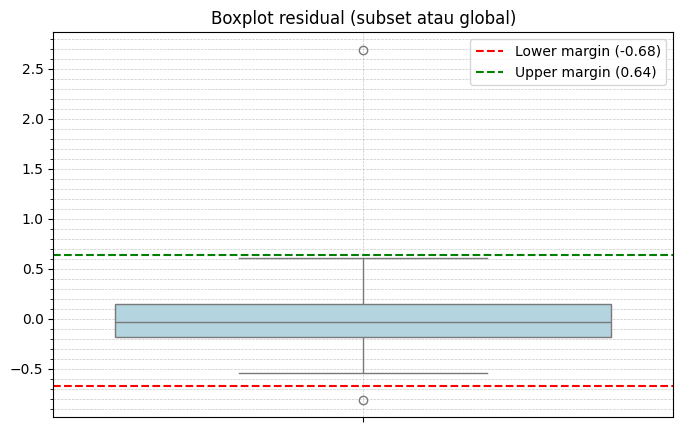

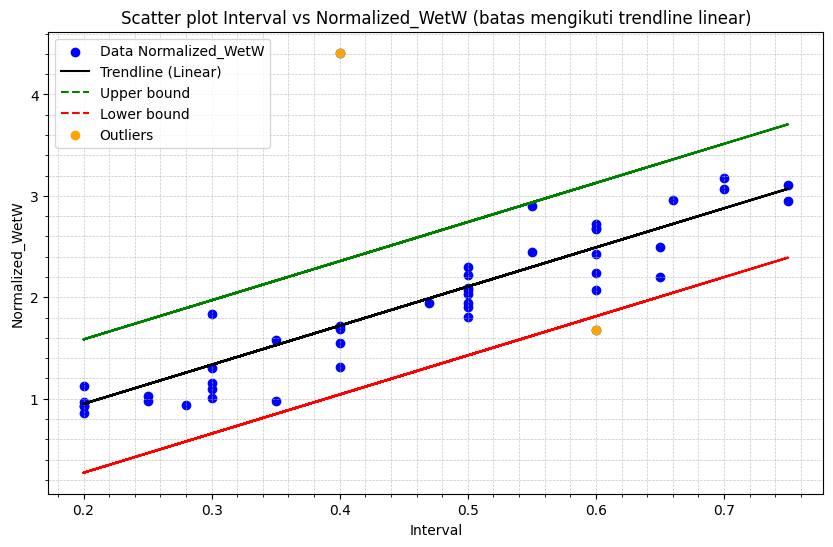

,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred,Outlier_Status
1935,CD500090,BINTANGOR BARAT UTARA,BINTANGOR,1.8,2.00,0.20,1.0,1.125,36.000,0.720,YLIM,None,ESAP,SAP,1.923970,1.231341,1.125,0.949107,Normal
3001,CS7210158,Bintangor Blok 1 Spasi 50,BINTANGOR,3.0,3.75,0.75,1.0,2.950,43.051,1.680,YLIM,None,ESAP,SAP,1.345354,0.766167,2.950,3.070666,Normal
3003,CS7210127,Bintangor Blok 2 Spasi 50,BINTANGOR,3.0,3.20,0.20,1.0,0.926,27.646,0.670,YLIM,None,ESAP,SAP,1.583641,1.145831,0.926,0.949107,Normal
3005,CS7210044,Bintangor Blok 2 Spasi 50,BINTANGOR,3.0,3.60,0.60,1.0,2.243,40.348,1.338,YLIM,None,ESAP,SAP,1.278656,0.762747,2.243,2.492059,Normal
3010,CS7210161,Bintangor Blok 1 Spasi 50,BINTANGOR,3.0,3.50,0.50,1.0,2.070,45.411,1.130,YLIM,None,ESAP,SAP,1.416042,0.773008,2.070,2.106321,Normal
3015,CD500062,BINTANGOR BARAT UTARA,BINTANGOR,3.0,3.30,0.30,1.0,1.008,39.980,0.605,YLIM,None,ESAP,SAP,1.149251,0.689779,1.008,1.334845,Normal
3434,CS7210043,Bintangor Blok 2 Spasi 50,BINTANGOR,3.0,3.65,0.65,1.0,2.499,40.056,1.498,YLIM,None,LIM,SAP,1.315009,0.788268,2.499,2.684928,Normal
3723,CS7210111,Bintangor Blok 2 Spasi 50,BINTANGOR,3.2,3.45,0.25,1.0,0.976,42.418,0.562,YLIM,None,ESAP,SAP,1.335320,0.768904,0.976,1.141976,Normal
3737,CS7210127,Bintangor Blok 2 Spasi 50,BINTANGOR,3.2,3.50,0.30,1.0,1.834,16.794,1.526,YLIM,None,SAP,SAP,2.090999,1.739839,1.834,1.334845,Normal
4063,CD500215,BINTANGOR BARAT UTARA,BINTANGOR,4.0,4.65,0.65,1.0,2.205,38.005,1.367,YLIM,None,ESAP,SAP,1.160302,0.719334,2.205,2.684928,Normal


In [371]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs Normalized_WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['Normalized_WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['Normalized_WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Tambahkan kolom status outlier ---
    def classify_outlier(val, pred):
        if val < pred + lower_margin:
            return "Outlier bawah"
        elif val > pred + upper_margin:
            return "Outlier atas"
        else:
            return "Normal"

    df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
    df_recovery['Outlier_Status'] = [
        classify_outlier(val, pred)
        for val, pred in zip(df_recovery['Normalized_WetW'], df_recovery['Trendline_Pred'])
    ]

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['Normalized_WetW'], color='blue', label='Data Normalized_WetW')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'], color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + upper_margin,
             color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + lower_margin,
             color='red', linestyle='--', label='Lower bound')

    # Outlier ditandai oranye
    outliers = df_recovery[df_recovery['Outlier_Status'] != "Normal"]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['Normalized_WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs Normalized_WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("Normalized_WetW")
    plt.legend()
    plt.show()

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
display(df_recovery.head(15))


Bin calculation:
Freedman–Diaconis -> bins=5, width=0.726477
Sturges -> bins=7, width=0.507143


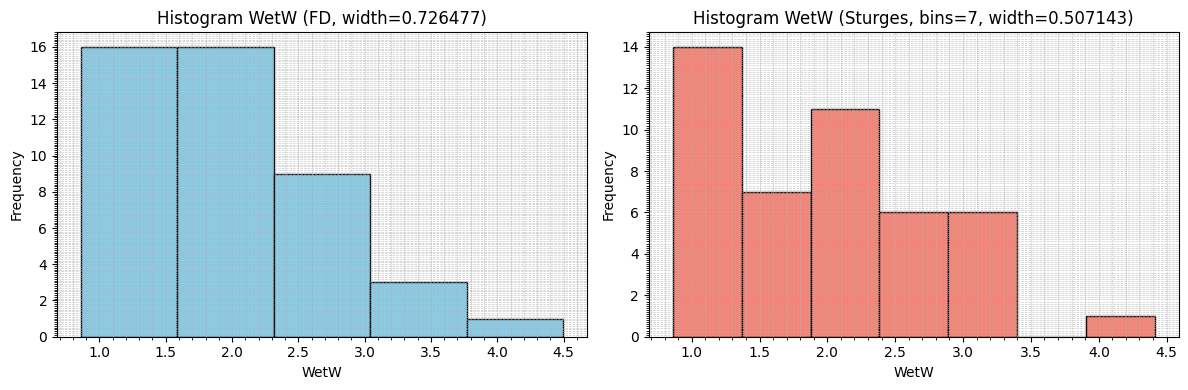


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.862000,1.588477,16
1,1.588477,2.314953,16
2,2.314953,3.041430,9
3,3.041430,3.767907,3
4,3.767907,4.494383,1



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.862000,1.369143,14
1,1.369143,1.876286,7
2,1.876286,2.383429,11
3,2.383429,2.890571,6
4,2.890571,3.397714,6
5,3.397714,3.904857,0
6,3.904857,4.412000,1


In [372]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def analyze_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns:
        print("Kolom 'WetW' tidak ada di dataframe.")
        return

    data = df_recovery['WetW'].dropna()
    if data.empty:
        print("Tidak ada data 'WetW' yang valid setelah drop NaN.")
        return

    # --- hitung jumlah bins ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram WetW (FD, width={width_fd_str})")
    axes[0].set_xlabel("WetW")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram WetW (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("WetW")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
wetw_data = analyze_wetw(df_recovery)

In [373]:
import numpy as np
from IPython.display import display

def filter_wetw_normal(df_recovery, lower_bound, upper_bound):
    """
    Filter data WetW berdasarkan batas bawah/atas,
    sekaligus memastikan hanya baris dengan Outlier_Status = 'Normal' yang lolos.
    Setelah selesai, kolom Outlier_Status dihapus.
    """
    # --- Filter berdasarkan WetW ---
    df_wetw = df_recovery[(df_recovery['WetW'] >= lower_bound) &
                          (df_recovery['WetW'] <= upper_bound)].copy()

    # --- Pastikan hanya baris Normal yang lolos ---
    if 'Outlier_Status' in df_wetw.columns:
        df_wetw = df_wetw[df_wetw['Outlier_Status'] == "Normal"].copy()
        # Drop kolom Outlier_Status setelah selesai
        df_wetw = df_wetw.drop(columns=['Outlier_Status'])
    else:
        print("Kolom Outlier_Status tidak ditemukan, hanya filter WetW yang diterapkan.")

    print(f"\nFiltered rows (Normal only): {len(df_wetw)}")
    display(df_wetw.head(10))

    return df_wetw

# --- Contoh pemanggilan ---
lower_bound = float(input("Masukkan batas bawah (>=): "))
upper_bound = float(input("Masukkan batas atas (<=): "))

df_wetw = filter_wetw_normal(df_recovery, lower_bound, upper_bound)

Masukkan batas bawah (>=): 1.369143
Masukkan batas atas (<=): 3.397714

Filtered rows (Normal only): 29


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
3001,CS7210158,Bintangor Blok 1 Spasi 50,BINTANGOR,3.0,3.75,0.75,1.0,2.950,43.051,1.680,YLIM,None,ESAP,SAP,1.345354,0.766167,2.950,3.070666
3005,CS7210044,Bintangor Blok 2 Spasi 50,BINTANGOR,3.0,3.60,0.60,1.0,2.243,40.348,1.338,YLIM,None,ESAP,SAP,1.278656,0.762747,2.243,2.492059
3010,CS7210161,Bintangor Blok 1 Spasi 50,BINTANGOR,3.0,3.50,0.50,1.0,2.070,45.411,1.130,YLIM,None,ESAP,SAP,1.416042,0.773008,2.070,2.106321
3434,CS7210043,Bintangor Blok 2 Spasi 50,BINTANGOR,3.0,3.65,0.65,1.0,2.499,40.056,1.498,YLIM,None,LIM,SAP,1.315009,0.788268,2.499,2.684928
3737,CS7210127,Bintangor Blok 2 Spasi 50,BINTANGOR,3.2,3.50,0.30,1.0,1.834,16.794,1.526,YLIM,None,SAP,SAP,2.090999,1.739839,1.834,1.334845
4063,CD500215,BINTANGOR BARAT UTARA,BINTANGOR,4.0,4.65,0.65,1.0,2.205,38.005,1.367,YLIM,None,ESAP,SAP,1.160302,0.719334,2.205,2.684928
4093,CS6210129,Bintangor Blok 2 Spasi 25,BINTANGOR,4.0,4.40,0.40,1.0,1.684,48.337,0.870,YLIM,None,ESAP,SAP,1.439984,0.743935,1.684,1.720583
4700,CS7210097,Bintangor Blok 2 Spasi 50,BINTANGOR,4.0,4.50,0.50,1.0,2.028,53.057,0.952,YLIM,None,SAP,SAP,1.387310,0.651242,2.028,2.106321
4844,CS7210265,Bintangor Blok 1 Spasi 50,BINTANGOR,4.4,5.00,0.60,1.0,2.720,52.206,1.300,YLIM,None,ESAP,SAP,1.550577,0.741085,2.720,2.492059
4855,CS7210296,Bintangor Blok 1 Spasi 50,BINTANGOR,4.4,5.00,0.60,1.0,2.070,50.725,1.020,YLIM,None,SAP,SAP,1.180035,0.581466,2.070,2.492059


#Filter By MC


Descriptive statistics for H2O:
Count: 29
Mean: 46.560483
Standard Error: 2.034729
Median: 48.148
Mode: 12.937
Standard Deviation: 10.957350
Sample Variance: 120.063509
Kurtosis: 2.713118
Skewness: -1.501598
Range: 48.535000000000004
Minimum: 12.937
Maximum: 61.472
Sum: 1350.254
Confidence Level (95%): ±4.167953

Bin calculation:
Freedman–Diaconis -> bins=8, width=6.677697
Sturges -> bins=6, width=8.089167


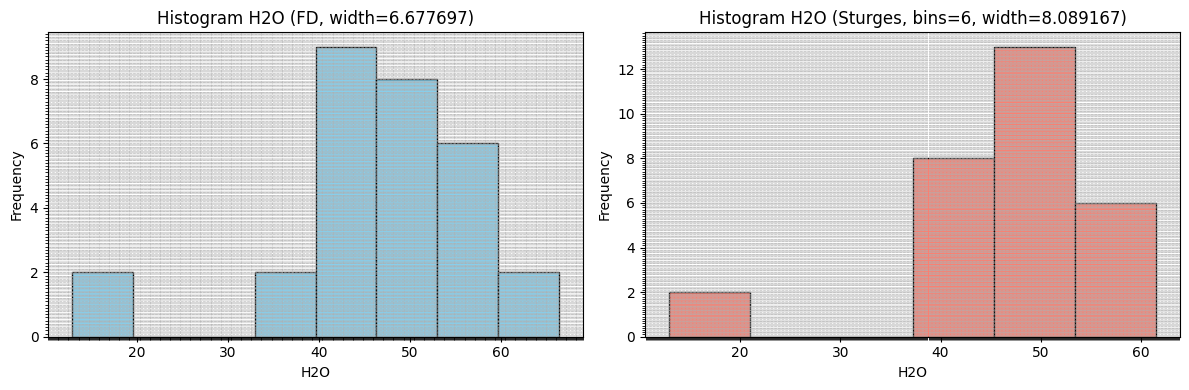


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,12.937000,19.614697,2
1,19.614697,26.292393,0
2,26.292393,32.970090,0
3,32.970090,39.647787,2
4,39.647787,46.325484,9
5,46.325484,53.003180,8
6,53.003180,59.680877,6
7,59.680877,66.358574,2



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,12.937000,21.026167,2
1,21.026167,29.115333,0
2,29.115333,37.204500,0
3,37.204500,45.293667,8
4,45.293667,53.382833,13
5,53.382833,61.472000,6


In [374]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="H2O"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_h2o(df_wetw):
    if 'H2O' not in df_wetw.columns:
        print("Kolom 'H2O' tidak ada di dataframe.")
        return

    data = df_wetw['H2O'].dropna()
    if data.empty:
        print("Tidak ada data 'H2O' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="H2O")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram H2O (FD, width={width_fd_str})")
    axes[0].set_xlabel("H2O")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram H2O (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("H2O")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
h2o_data = analyze_h2o(df_wetw)

In [375]:

import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_wetw berdasarkan H2O
df_h2o = df_wetw[(df_wetw['H2O'] >= lower_bound) &
                 (df_wetw['H2O'] <= upper_bound)].copy()

print(f"\nFiltered rows (H2O): {len(df_h2o)}")
display(df_h2o.head(10))

is greater than or equal to: 32.970090
is less than or equal to: 66.358574

Filtered rows (H2O): 27


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
3001,CS7210158,Bintangor Blok 1 Spasi 50,BINTANGOR,3.0,3.75,0.75,1.0,2.950,43.051,1.680,YLIM,None,ESAP,SAP,1.345354,0.766167,2.950,3.070666
3005,CS7210044,Bintangor Blok 2 Spasi 50,BINTANGOR,3.0,3.60,0.60,1.0,2.243,40.348,1.338,YLIM,None,ESAP,SAP,1.278656,0.762747,2.243,2.492059
3010,CS7210161,Bintangor Blok 1 Spasi 50,BINTANGOR,3.0,3.50,0.50,1.0,2.070,45.411,1.130,YLIM,None,ESAP,SAP,1.416042,0.773008,2.070,2.106321
3434,CS7210043,Bintangor Blok 2 Spasi 50,BINTANGOR,3.0,3.65,0.65,1.0,2.499,40.056,1.498,YLIM,None,LIM,SAP,1.315009,0.788268,2.499,2.684928
4063,CD500215,BINTANGOR BARAT UTARA,BINTANGOR,4.0,4.65,0.65,1.0,2.205,38.005,1.367,YLIM,None,ESAP,SAP,1.160302,0.719334,2.205,2.684928
4093,CS6210129,Bintangor Blok 2 Spasi 25,BINTANGOR,4.0,4.40,0.40,1.0,1.684,48.337,0.870,YLIM,None,ESAP,SAP,1.439984,0.743935,1.684,1.720583
4700,CS7210097,Bintangor Blok 2 Spasi 50,BINTANGOR,4.0,4.50,0.50,1.0,2.028,53.057,0.952,YLIM,None,SAP,SAP,1.387310,0.651242,2.028,2.106321
4844,CS7210265,Bintangor Blok 1 Spasi 50,BINTANGOR,4.4,5.00,0.60,1.0,2.720,52.206,1.300,YLIM,None,ESAP,SAP,1.550577,0.741085,2.720,2.492059
4855,CS7210296,Bintangor Blok 1 Spasi 50,BINTANGOR,4.4,5.00,0.60,1.0,2.070,50.725,1.020,YLIM,None,SAP,SAP,1.180035,0.581466,2.070,2.492059
5260,CS6210117,Bintangor Blok 2 Spasi 25,BINTANGOR,5.0,5.70,0.70,1.0,3.065,56.509,1.333,YLIM,None,ESAP,SAP,1.497642,0.651340,3.065,2.877797


# Filter By DTF


Descriptive statistics for DTF:
Count: 27
Mean: 0.724735
Standard Error: 0.020276
Median: 0.74108459
Mode: 0.766167453
Standard Deviation: 0.105358
Sample Variance: 0.011100
Kurtosis: -0.311745
Skewness: 0.242389
Range: 0.429725414
Minimum: 0.540421685
Maximum: 0.970147099
Sum: 19.567838899999998
Confidence Level (95%): ±0.041678

Bin calculation:
Freedman–Diaconis -> bins=6, width=0.085083
Sturges -> bins=6, width=0.071621


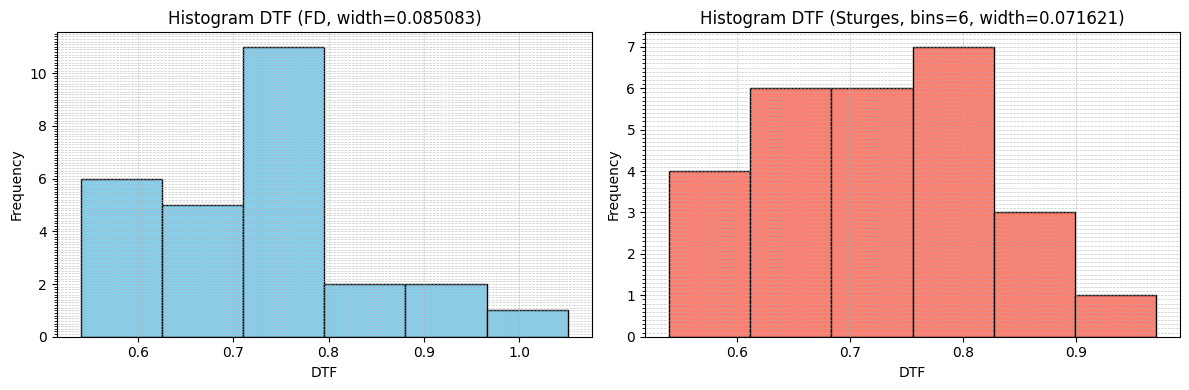


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.540422,0.625505,6
1,0.625505,0.710588,5
2,0.710588,0.795672,11
3,0.795672,0.880755,2
4,0.880755,0.965838,2
5,0.965838,1.050922,1



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.540422,0.612043,4
1,0.612043,0.683663,6
2,0.683663,0.755284,6
3,0.755284,0.826905,7
4,0.826905,0.898526,3
5,0.898526,0.970147,1


In [376]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="DTF"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_dtf(df_h2o):
    if 'DTF' not in df_h2o.columns:
        print("Kolom 'DTF' tidak ada di dataframe.")
        return

    data = df_h2o['DTF'].dropna()
    if data.empty:
        print("Tidak ada data 'DTF' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="DTF")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram DTF (FD, width={width_fd_str})")
    axes[0].set_xlabel("DTF")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram DTF (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("DTF")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
dtf_data = analyze_dtf(df_h2o)

In [377]:
import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_h2o berdasarkan DTF
df_dtf = df_h2o[(df_h2o['DTF'] >= lower_bound) &
                (df_h2o['DTF'] <= upper_bound)].copy()

print(f"\nFiltered rows (DTF): {len(df_dtf)}")
display(df_dtf.head(400))

is greater than or equal to: 0.540422
is less than or equal to: 0.898526

Filtered rows (DTF): 25


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
3001,CS7210158,Bintangor Blok 1 Spasi 50,BINTANGOR,3.00,3.75,0.75,1.00,2.950,43.051,1.680,YLIM,None,ESAP,SAP,1.345354,0.766167,2.950,3.070666
3005,CS7210044,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.60,0.60,1.00,2.243,40.348,1.338,YLIM,None,ESAP,SAP,1.278656,0.762747,2.243,2.492059
3010,CS7210161,Bintangor Blok 1 Spasi 50,BINTANGOR,3.00,3.50,0.50,1.00,2.070,45.411,1.130,YLIM,None,ESAP,SAP,1.416042,0.773008,2.070,2.106321
3434,CS7210043,Bintangor Blok 2 Spasi 50,BINTANGOR,3.00,3.65,0.65,1.00,2.499,40.056,1.498,YLIM,None,LIM,SAP,1.315009,0.788268,2.499,2.684928
4063,CD500215,BINTANGOR BARAT UTARA,BINTANGOR,4.00,4.65,0.65,1.00,2.205,38.005,1.367,YLIM,None,ESAP,SAP,1.160302,0.719334,2.205,2.684928
4093,CS6210129,Bintangor Blok 2 Spasi 25,BINTANGOR,4.00,4.40,0.40,1.00,1.684,48.337,0.870,YLIM,None,ESAP,SAP,1.439984,0.743935,1.684,1.720583
4700,CS7210097,Bintangor Blok 2 Spasi 50,BINTANGOR,4.00,4.50,0.50,1.00,2.028,53.057,0.952,YLIM,None,SAP,SAP,1.387310,0.651242,2.028,2.106321
4844,CS7210265,Bintangor Blok 1 Spasi 50,BINTANGOR,4.40,5.00,0.60,1.00,2.720,52.206,1.300,YLIM,None,ESAP,SAP,1.550577,0.741085,2.720,2.492059
4855,CS7210296,Bintangor Blok 1 Spasi 50,BINTANGOR,4.40,5.00,0.60,1.00,2.070,50.725,1.020,YLIM,None,SAP,SAP,1.180035,0.581466,2.070,2.492059
5260,CS6210117,Bintangor Blok 2 Spasi 25,BINTANGOR,5.00,5.70,0.70,1.00,3.065,56.509,1.333,YLIM,None,ESAP,SAP,1.497642,0.651340,3.065,2.877797


# SUMMARY

In [378]:
import numpy as np
import scipy.stats as stats

def descriptive_stats(series, label):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

# --- Jalankan untuk semua kolom yang diminta ---
target_columns = ["Interval", "CoreRec", "WetW", "H2O", "DryW", "WTF", "DTF"]

for col in target_columns:
    if col in df_dtf.columns:
        descriptive_stats(df_dtf[col], label=col)
    else:
        print(f"\nKolom {col} tidak ditemukan di df_dtf.")


Descriptive statistics for Interval:
Count: 25
Mean: 0.565200
Standard Error: 0.021417
Median: 0.6
Mode: 0.5
Standard Deviation: 0.107087
Sample Variance: 0.011468
Kurtosis: -0.680159
Skewness: -0.067319
Range: 0.4
Minimum: 0.35
Maximum: 0.75
Sum: 14.129999999999999
Confidence Level (95%): ±0.044203

Descriptive statistics for CoreRec:
Count: 25
Mean: 1.002400
Standard Error: 0.002400
Median: 1.0
Mode: 1.0
Standard Deviation: 0.012000
Sample Variance: 0.000144
Kurtosis: 20.041667
Skewness: 4.694855
Range: 0.06000000000000005
Minimum: 1.0
Maximum: 1.06
Sum: 25.060000000000002
Confidence Level (95%): ±0.004953

Descriptive statistics for WetW:
Count: 25
Mean: 2.337360
Standard Error: 0.096300
Median: 2.243
Mode: 2.07
Standard Deviation: 0.481501
Sample Variance: 0.231844
Kurtosis: -0.969055
Skewness: 0.185802
Range: 1.6280000000000001
Minimum: 1.552
Maximum: 3.18
Sum: 58.434000000000005
Confidence Level (95%): ±0.198754

Descriptive statistics for H2O:
Count: 25
Mean: 48.632120
Standard

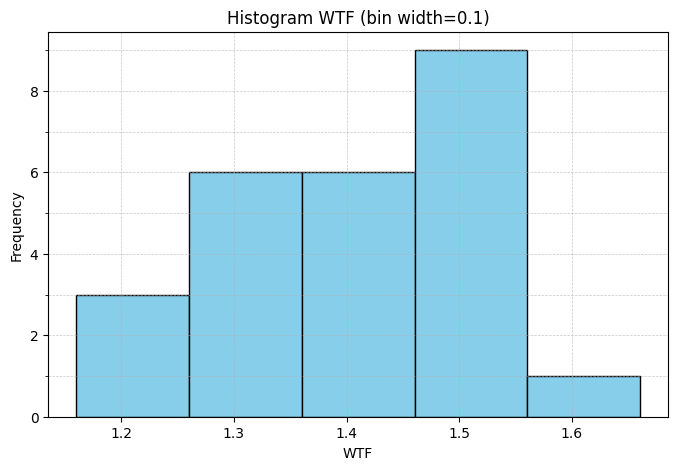


Tabel Histogram WTF:


,Bin Start,Bin End,Frequency
0,1.160302,1.260302,3
1,1.260302,1.360302,6
2,1.360302,1.460302,6
3,1.460302,1.560302,9
4,1.560302,1.660302,1


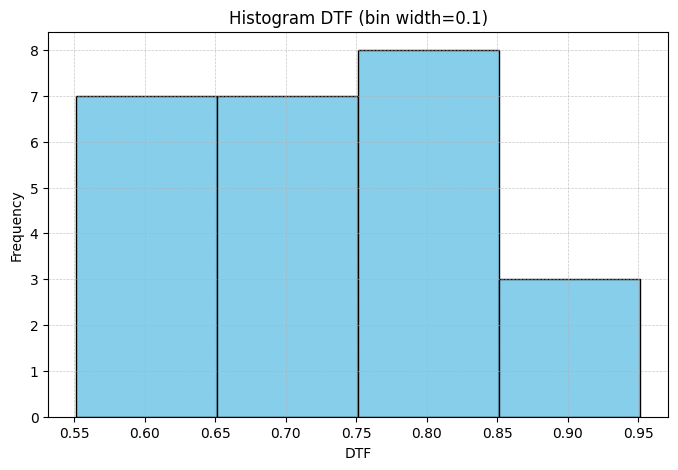


Tabel Histogram DTF:


,Bin Start,Bin End,Frequency
0,0.551367,0.651367,7
1,0.651367,0.751367,7
2,0.751367,0.851367,8
3,0.851367,0.951367,3


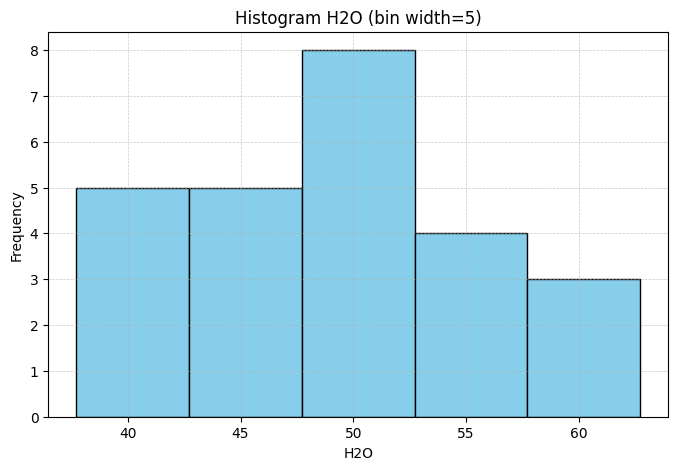


Tabel Histogram H2O:


,Bin Start,Bin End,Frequency
0,37.718,42.718,5
1,42.718,47.718,5
2,47.718,52.718,8
3,52.718,57.718,4
4,57.718,62.718,3


In [379]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator

def plot_histogram_fixed_width(series, bin_width, label):
    data = series.dropna().values
    if len(data) == 0:
        print(f"Tidak ada data untuk {label}.")
        return None

    # Tentukan bins berdasarkan bin_width
    min_val, max_val = data.min(), data.max()
    bins = np.arange(min_val, max_val + bin_width, bin_width)

    # Plot histogram
    plt.figure(figsize=(8,5))
    counts, edges, _ = plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f"Histogram {label} (bin width={bin_width})")
    plt.xlabel(label)
    plt.ylabel("Frequency")

    # Minor ticks sesuai bin width
    plt.gca().xaxis.set_minor_locator(MultipleLocator(bin_width))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

    # Buat tabel histogram
    table = pd.DataFrame({
        "Bin Start": edges[:-1],
        "Bin End": edges[1:],
        "Frequency": counts.astype(int)
    })

    print(f"\nTabel Histogram {label}:")
    display(table)
    return table

# --- Contoh pemanggilan ---
table_wtf = plot_histogram_fixed_width(df_dtf['WTF'], bin_width=0.1, label="WTF")
table_dtf = plot_histogram_fixed_width(df_dtf['DTF'], bin_width=0.1, label="DTF")
table_h2o = plot_histogram_fixed_width(df_dtf['H2O'], bin_width=5, label="H2O")

In [380]:
import pandas as pd

# Input nama Block, GEN_LYR, dan Material
block_name = input("Masukkan nama Block: ")
gen_lyr = input("Masukkan GEN_LYR: ")
material = input("Masukkan Material: ")

# Hitung nilai ringkasan (contoh: mean)
summary = {
    "Block": block_name,
    "GEN_LYR": gen_lyr,
    "Material": material,
    "Interval_mean": df_dtf['Interval'].dropna().mean(),
    "CoreRec_mean": df_dtf['CoreRec'].dropna().mean(),
    "WetW_mean": df_dtf['WetW'].dropna().mean(),
    "H2O_mean": df_dtf['H2O'].dropna().mean(),
    "DryW_mean": df_dtf['DryW'].dropna().mean(),
    "WTF_mean": df_dtf['WTF'].dropna().mean(),
    "DTF_mean": df_dtf['DTF'].dropna().mean()
}

# Buat nama variabel DataFrame sesuai input
var_name = f"df_{block_name.replace(' ', '_').lower()}_{gen_lyr.lower()}_{material.lower()}"
globals()[var_name] = pd.DataFrame([summary])

print(f"\nTabel Ringkasan tersimpan sebagai variabel: {var_name}")
display(globals()[var_name])

Masukkan nama Block: Bintangor
Masukkan GEN_LYR: SAP
Masukkan Material: YLIM

Tabel Ringkasan tersimpan sebagai variabel: df_bintangor_sap_ylim


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Bintangor,SAP,YLIM,0.5652,1.0024,2.33736,48.63212,1.19796,1.412775,0.722291


# Proporsional Averaging

In [285]:
import pandas as pd

# Gabungkan semua DataFrame jadi satu
df_belambus_selatan_brk_all = pd.concat([
    df_belambus_selatan_brk_altspt,
    df_belambus_selatan_brk_althgt,
    df_belambus_selatan_brk_br,
    df_belambus_selatan_brk_dnt,
    df_belambus_selatan_brk_hgt,
    df_belambus_selatan_brk_hshgt,
    df_belambus_selatan_brk_spt
], ignore_index=True)

# Cek hasil
print(df_belambus_selatan_brk_all.shape)
display(df_belambus_selatan_brk_all.head())

(7, 10)


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Belambus Selatan,BRK,ALT SPT,1.0,1.0,5.582000,8.883250,5.087000,1.903017,1.734262
1,Belambus Selatan,BRK,ALT-HGT,1.0,1.0,4.986667,3.139333,4.830000,1.700056,1.646645
2,Belambus Selatan,BRK,BR,1.0,1.0,5.229444,3.667778,5.036667,1.782824,1.717102
3,Belambus Selatan,BRK,DNT,1.0,1.0,6.222750,2.146750,6.089000,2.128423,2.082676
4,Belambus Selatan,BRK,HGT,1.0,1.0,5.497500,3.130750,5.325500,1.877266,1.818528


In [286]:
# Daftar material yang memang ada di hasil filter
materials_filter = df_belambus_selatan_brk_all['Material'].unique().tolist()

# Initialize df_raw with the df_block DataFrame
df_raw = df_block.copy()

# Filter raw data hanya untuk material yang relevan
df_raw_filtered = df_raw[df_raw['Material'].isin(materials_filter)]

# Hitung jumlah raw per material
raw_counts = df_raw_filtered['Material'].value_counts().reset_index()
raw_counts.columns = ['Material', 'Raw_Count']

# Hitung jumlah hasil filter per material
filtered_counts = df_belambus_selatan_brk_all['Material'].value_counts().reset_index()
filtered_counts.columns = ['Material', 'Filtered_Count']

# Gabungkan
summary = pd.merge(raw_counts, filtered_counts, on='Material', how='inner')

# Hitung persentase proporsi tiap material terhadap total raw relevan
summary['Percentage_of_Total'] = (summary['Raw_Count'] / summary['Raw_Count'].sum()) * 100

print("\nSummary per Material (hanya material relevan):")
display(summary)


Summary per Material (hanya material relevan):


,Material,Raw_Count,Filtered_Count,Percentage_of_Total
0,BR,44,1,23.783784
1,SPT,36,1,19.459459
2,HGT,35,1,18.918919
3,ALT SPT,23,1,12.432432
4,HS HGT,21,1,11.351351
5,DNT,16,1,8.648649
6,ALT-HGT,10,1,5.405405


In [287]:
import numpy as np
import pandas as pd

# --- 1. Buat mapping material -> proporsi (dari summary yang sudah dihitung sebelumnya) ---
weights_map = summary.set_index('Material')['Percentage_of_Total'] / 100.0

# --- 2. Fungsi untuk weighted descriptive statistics ---
def weighted_means(df, weights_map):
    stats = {}
    for col in ['Interval_mean','CoreRec_mean','WetW_mean','H2O_mean','DryW_mean','WTF_mean','DTF_mean']:
        values = df[col].values
        # Ambil bobot sesuai material tiap baris
        w = df['Material'].map(weights_map).values

        # Weighted mean
        mean = np.average(values, weights=w)

        # Simpan hasil
        stats[col] = mean

    return pd.DataFrame([stats])

# --- 3. Hitung descriptive statistics proporsional ---
summary_means = weighted_means(df_belambus_selatan_brk_all, weights_map)

print("\nDescriptive Statistics Proporsional (Material, Weighted Means):")
display(summary_means)


Descriptive Statistics Proporsional (Material, Weighted Means):


,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,1.0,1.0,5.381342,4.451587,5.144737,1.836069,1.755359
